KMO Test Value: 0.6733197201419855
Bartlett's Test of Sphericity: (3553.49401051017, 0.0)


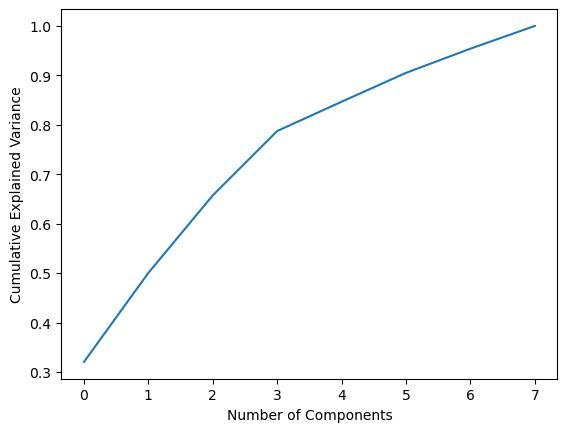

Average R^2 Score from 5-Fold Cross-Validation: 0.6540363596527545
Eigenvalues: [2.52488038 1.49100008 1.25508174 1.00612626 0.49948032 0.48889428
 0.37861364 0.35592329]
       Factor 1  Factor 2  Factor 3
item1 -0.153636 -0.004867  0.895841
item2 -0.066520  0.579106 -0.116995
item3  0.865904 -0.024849  0.037241
item4  0.013014  0.633525  0.096820
item5  0.459239 -0.021081  0.700042
item6  0.012734  0.871260  0.002000
item7  0.853810 -0.045397  0.026050
item8  0.857393  0.001019  0.033443
Cronbach's Alpha: 0.5324976693382939


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt


# Load your dataset
# Replace 'your_data.csv' with the path to your dataset file
df = pd.read_csv('8items.csv')
df = df.iloc[:, 1:]

# Check for suitability for factor analysis
kmo_all, kmo_model = calculate_kmo(df)
bartlett_sphericity = calculate_bartlett_sphericity(df)
print("KMO Test Value:", kmo_model)
print("Bartlett's Test of Sphericity:", bartlett_sphericity)


# Initialize factor analysis object
# You can adjust the number of factors (n_factors) based on your hypothesis or exploration
fa = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal')

# Fit the model to your data
fa.fit(df)

# Get the Eigenvalues and loadings
ev, _ = fa.get_eigenvalues()
loadings = fa.loadings_

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Number of folds for k-fold cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Number of components to retain in PCA
n_components = 3

# To store R^2 scores for each fold
r2_scores = []

for train_index, test_index in kf.split(df):
    # Split data into training and test sets
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]

    # Fit PCA on the training data
    pca = PCA(n_components=n_components)
    pca.fit(X_train)

    # Transform the test data
    X_test_pca = pca.transform(X_test)

    # Reconstruct the test data from PCA components
    X_test_reconstructed = pca.inverse_transform(X_test_pca)

    # Calculate R^2 score and append to the list
    r2 = r2_score(X_test, X_test_reconstructed)
    r2_scores.append(r2)

# Compute the average R^2 score
average_r2_score = np.mean(r2_scores)

print(f'Average R^2 Score from {n_splits}-Fold Cross-Validation: {average_r2_score}')
# Print Eigenvalues
print("Eigenvalues:", ev)


#Print factor loadings
# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Print the DataFrame and Save the loadings to a CSV file
loadings_df.to_csv('factor_loadings_3.csv', index=True)
print(loadings_df)

# Function to calculate Cronbach's Alpha
def cronbach_alpha(df):
    # Count the number of items
    k = df.shape[1]
    # Calculate the variance for each item
    variances = df.var(axis=0, ddof=1)
    # Calculate the variance of the total scores
    total_variance = df.sum(axis=1).var(ddof=1)
    # Calculate Cronbach's Alpha
    return (k / (k-1)) * (1 - (variances.sum() / total_variance))

# Calculate Cronbach's Alpha for the dataset
alpha = cronbach_alpha(df)
print(f"Cronbach's Alpha: {alpha}")


KMO Test Value: 0.6733197201419855
Bartlett's Test of Sphericity: (3553.49401051017, 0.0)


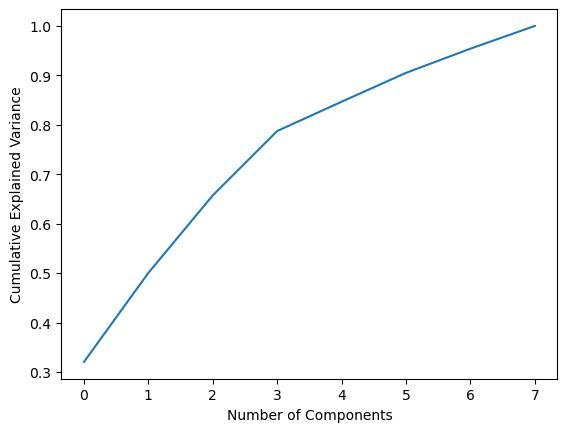

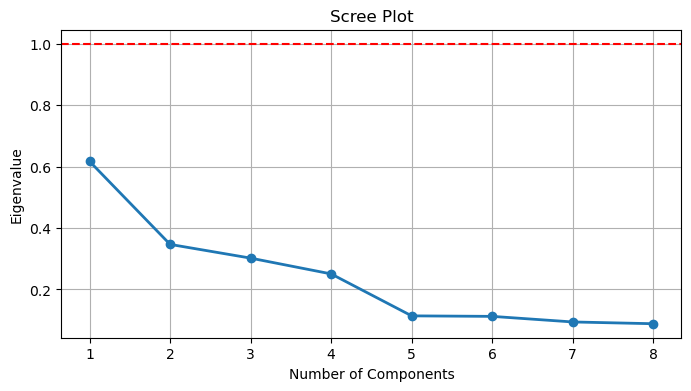

Factor 1 R^2 Scores:
  item1: 0.0006990367447874402
  item2: 0.019646706546566306
  item3: 0.7367876999465215
  item4: 0.0003688179223796384
  item5: 0.3253674100248247
  item6: 0.0034904744505220853
  item7: 0.7175339119625408
  item8: 0.7182230815813548

Factor 2 R^2 Scores:
  item1: 0.0014515484754414887
  item2: 0.34637725623891613
  item3: 0.0027869853971531633
  item4: 0.43155890348046144
  item5: 1.559832665720684e-05
  item6: 0.6976965539291703
  item7: 0.0009334779978321661
  item8: 0.0059930248937956065

Factor 3 R^2 Scores:
  item1: 0.8582967854289058
  item2: 0.012099675055010084
  item3: 0.014350533925921227
  item4: 0.021218558521746478
  item5: 0.3161593368299658
  item6: 0.0009119135750040863
  item7: 0.01594671098349143
  item8: 0.01458681784430893

Factor 4 R^2 Scores:
  item1: 0.015681777884086312
  item2: 0.5274890292411025
  item3: 0.00017230708842996822
  item4: 0.4441646562338556
  item5: 0.01719619773991088
  item6: 0.00035666080433760516
  item7: 0.000379345220

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt


# Load your dataset
# Replace 'your_data.csv' with the path to your dataset file
df = pd.read_csv('8items.csv')
df = df.iloc[:, 1:]

# Check for suitability for factor analysis
kmo_all, kmo_model = calculate_kmo(df)
bartlett_sphericity = calculate_bartlett_sphericity(df)
print("KMO Test Value:", kmo_model)
print("Bartlett's Test of Sphericity:", bartlett_sphericity)

# Get the Eigenvalues and loadings
ev, _ = fa.get_eigenvalues()
loadings = fa.loadings_

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Extract the eigenvalues
eigenvalues = pca.explained_variance_

# Creating the scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser criterion (Eigenvalue=1)
plt.grid(True)
plt.show()

# Initialize factor analysis object
# You can adjust the number of factors (n_factors) based on your hypothesis or exploration
fa = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal')

# Fit the model to your data
fa.fit(df)


# Fit PCA on the entire dataset
n_components = 4  # or however many factors you've decided to retain
pca = PCA(n_components=n_components)
pca.fit(df)

# Extract the PCA components and the transformed data
components = pca.components_
transformed_data = pca.transform(df)

# Initialize a dictionary to store R^2 scores
r2_scores = {f'Factor {i+1}': {} for i in range(n_components)}

# Calculate R^2 for each item with respect to each factor
for i in range(n_components):
    # Reconstruct data using only the i-th factor
    reconstructed = np.dot(transformed_data[:, i:i+1], components[i:i+1, :])
    reconstructed += pca.mean_
    
    # Calculate R^2 for each item
    for j, item in enumerate(df.columns):
        r2_scores[f'Factor {i+1}'][item] = r2_score(df[item], reconstructed[:, j])

# Print R^2 scores
for factor, scores in r2_scores.items():
    print(f"{factor} R^2 Scores:")
    for item, score in scores.items():
        print(f"  {item}: {score}")
    print()

# Print Eigenvalues
print("Eigenvalues:", ev)


#Print factor loadings
# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Print the DataFrame and Save the loadings to a CSV file
loadings_df.to_csv('factor_loadings_4.csv', index=True)
print(loadings_df)

# Function to calculate Cronbach's Alpha
def cronbach_alpha(df):
    # Count the number of items
    k = df.shape[1]
    # Calculate the variance for each item
    variances = df.var(axis=0, ddof=1)
    # Calculate the variance of the total scores
    total_variance = df.sum(axis=1).var(ddof=1)
    # Calculate Cronbach's Alpha
    return (k / (k-1)) * (1 - (variances.sum() / total_variance))

# Calculate Cronbach's Alpha for the dataset
alpha = cronbach_alpha(df)
print(f"Cronbach's Alpha: {alpha}")
